<a href="https://colab.research.google.com/github/RwGrid/Background-Matting/blob/master/classify_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install soundfile

In [78]:
%ls

 audio/                                      models/
 bc_utils.py                                 my_modelnew_newcoughs2.h5
 categories/                                 new_data_file_with_more_cough2.hkl
 clr_callback.py                            'old models'/
 environmental-sound-classification-50.zip   pyaudioclassification/
 esc50.csv                                   __pycache__/
 featurete.npy                              'Test wav files'/
 first_cough_addition_features/              utils2.py
 labelee_new2.npy                            utils.py


In [3]:
%cd drive
%cd 'My Drive'
%cd soundclasify

/content/drive
/content/drive/My Drive
/content/drive/My Drive/soundclasify


tqdm library is a library that gives us a progress bar  as seen in file :https://github.com/micah5/pyAudioClassification/blob/master/pyaudioclassification/feat_extract.py ------------------------- here line 43 , 44 we create a progress bar to our extraction


In [4]:
!cat '/content/drive/My Drive/soundclasify/pyaudioclassification/intializemodels.py'

from __future__ import absolute_import
import os
from pyaudioclassification.feat_extract import parse_audio_files, parse_audio_file
import numpy as np
import pyaudioclassification.models
from keras.utils import to_categorical
from keras.optimizers import SGD
#from models import svm, nn, cnn

def feature_extraction(data_path):
    """Parses audio files in supplied data path.
    -*- author: mtobeiyf https://github.com/mtobeiyf/audio-classification -*-
    """
    r = os.listdir(data_path)
    r.sort()
    features, labels = parse_audio_files(data_path, r)
    return features, labels

def train(features, labels, type='cnn', num_classes=None, print_summary=False,
    save_model=False, lr=0.01, loss_type=None, epochs=50, optimizer='SGD', verbose=True):
    """Trains model based on provided feature & target data
    Options:
    - epochs: The number of iterations. Default is 50.
    - lr: Learning rate. Increase to speed up training time, decrease to get more accurate results (if your loss 

In [5]:
import sys
sys.path.append('/content/drive/My Drive/soundclasify/pyaudioclassification')

In [6]:
import intializemodels

Using TensorFlow backend.


In [7]:
from intializemodels import feature_extraction, train, predict, print_leaderboard

In [ ]:
%ls

 audio/                                      models/
 bc_utils.py                                 my_modelnew_newcoughs2.h5
 categories/                                 new_data_file_with_more_cough2.hkl
 clr_callback.py                            'old models'/
 environmental-sound-classification-50.zip   pyaudioclassification1/
 esc50.csv                                   __pycache__/
 featurete.npy                              'Test wav files'/
 first_cough_addition_features/              utils2.py
 labelee_new2.npy                            utils.py


In [ ]:
features, labels = feature_extraction('/content/drive/My Drive/soundclasify/categories')

In [ ]:
print(features.shape)

(1965, 193)


In [ ]:
print(labels.shape)

(1965,)


In [ ]:
print(labels.shape)

(1960,)


In [ ]:
import numpy as np

In [ ]:
np.save('labelee_new2', labels)


In [ ]:

# this is library build on pickle , to store features we extracted and load them when we want
# we used it instead of numpy cuz numpy was screwing the shape of the array, so it cannot be loaded  ,
# it saved me 50 mins loading features each time 

SyntaxError: ignored

In [ ]:
pip install hickle 

     |████████████████████████████████| 51kB 1.6MB/s 


In [ ]:
import hickle as hkl 

In [ ]:
hkl.dump( features, 'new_data_file_with_more_cough2.hkl' )




In [ ]:
# Load data from file
features = hkl.load( '/content/drive/My Drive/soundclasify/new_data_file_with_more_cough.hkl' )
print(features.shape)

(1965, 193)


In [ ]:
features = np.load('%s.npy' % '/content/drive/My Drive/Features')#this is wrong 

In [ ]:
print(features.shape)# this is wrong, the numpy library is changing the dimensions of the feature matrix 
# which is not accepted by the neural network model

(120, 193)


In [ ]:
labels=np.load('/content/drive/My Drive/Features/labelee.npy')

In [ ]:
np.save('featurete', features)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.2,
    decay_steps=5000,
    decay_rate=0.9)


In [ ]:
initial_learning_rate = 0.1
lr_schedule =keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule,momentum=0.9)

In [ ]:
 
model = train(features, labels,epochs=1500,optimizer=optimizer,num_classes=49)

Epoch 1/1500
1977/1977 [==============================] - 3s 1ms/step - loss: 3.9789 - accuracy: 0.0167
Epoch 2/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8966 - accuracy: 0.0212
Epoch 3/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8740 - accuracy: 0.0248
Epoch 4/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8771 - accuracy: 0.0268
Epoch 5/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8576 - accuracy: 0.0339
Epoch 6/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8551 - accuracy: 0.0288
Epoch 7/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8515 - accuracy: 0.0263
Epoch 8/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8434 - accuracy: 0.0364
Epoch 9/1500
1977/1977 [==============================] - 2s 1ms/step - loss: 3.8400 - accuracy: 0.0354
Epoch 10/1500
1977/1977 [==============================] - 2s 1m

In [ ]:
print(labels.shape)

(1960,)


In [ ]:
%ls
%cd models

audio/       categories/                                esc50.csv  utils2.py
bc_utils.py  environmental-sound-classification-50.zip  models/    utils.py
/content/drive/My Drive/soundclasify/models


In [8]:
from keras.models import load_model # cricket classification is not working 



In [ ]:
model.save('/content/drive/My Drive/soundclasify/my_modelnew_newcoughs2.h5')

In [9]:
model = load_model('/content/drive/My Drive/soundclasify/first_cough_addition_features/my_modelnew_newcoughs.h5')

In [ ]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
model.metrics

In [35]:
pred = predict(model,'/content/drive/My Drive/soundclasify/Test wav files/Heidi coughing.wav')

In [37]:
print()

[[1.90525068e-04 4.46642888e-17 3.81502554e-16 2.23005113e-13
  2.11093697e-15 8.87892526e-18 1.02538825e-10 1.47375093e-14
  1.26388684e-07 2.92526132e-15 1.15258854e-15 2.81363040e-08
  1.64261649e-12 6.58054950e-14 2.53603538e-03 3.61128547e-19
  2.30913588e-06 6.83735566e-13 6.35011475e-08 4.95218033e-10
  9.58235160e-14 5.36998268e-04 1.48825256e-15 3.09375286e-01
  4.93575699e-20 5.30155296e-15 8.37685366e-06 1.83860677e-10
  1.13976200e-12 1.85263195e-17 3.71244317e-03 7.86019600e-12
  3.41782239e-13 3.82864021e-17 7.77656002e-14 3.02953891e-15
  7.77316444e-14 2.06004842e-07 8.30693825e-05 2.34497763e-16
  1.47670387e-16 1.75107881e-01 2.38318593e-17 3.60936629e-14
  3.25092749e-15 2.30904263e-18 1.05190470e-15 2.32518905e-05
  5.08423388e-01]]


In [36]:
print_leaderboard(pred,'/content/drive/My Drive/soundclasify/categories')

IndexError: ignored

In [10]:
y_pred=[]

In [51]:
def append_cough_list2(get_predictions):
  sorted_pred=(-get_predictions).argsort()[0][0:3]
  count=0
  for i in sorted_pred: 
      if(i == 11) : 
        y_pred.append(1)
          
      elif i!=11:
          count+=1
  if count ==3:
    y_pred.append(0)  

In [52]:
import os # get the wav files inside the test wav files directory
import glob
import numpy
wavfiles = []
for file in glob.glob("/content/drive/My Drive/soundclasify/Test wav files/*.wav"):
    wavfiles.append((file))#os.path.basename: the os.path.base name is to get the file name without the whole path
wavfiles.sort()    

In [53]:
wavfiles#frog is actual, prediction is cough ...false positive



['/content/drive/My Drive/soundclasify/Test wav files/Applaus sound.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/Cat Speak.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/Heidi coughing.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/Lauraa LOL.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/Male bronchitis cough2.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/Nick Jr frog.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/VELHO DA TOSSE.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/WhatsApp Video 2020-06-28 at 12.59.12 PM.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/WhatsApp Video 2020-06-28 at 4.42.12 PM (1).wav',
 '/content/drive/My Drive/soundclasify/Test wav files/Whooping Cough.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/abdkareem_cough3.wav',
 '/content/drive/My Drive/soundclasify/Test wav files/cough_woman.wav',
 '/content/drive/My Drive/soundclasify/Test wav fi

In [54]:
# get the list of y predicted for the test dataset

y_pred=[]
for file in wavfiles:

  append_cough_list2(predict(model,file))


In [55]:
print(y_pred)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [57]:
y_real=[0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1]#0011101111111001

In [58]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

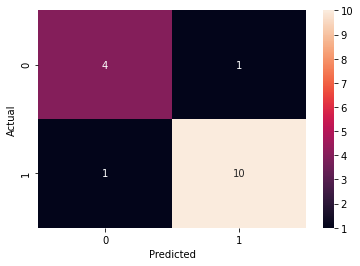

In [59]:
data = {'y_Actual':    y_real,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [60]:
from sklearn.metrics import precision_score,recall_score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

In [66]:
precision_score(y_real, y_pred, average='macro')

0.8545454545454545

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [65]:
recall_score(y_real, y_pred, average='macro')

0.8545454545454545

In [76]:
pip install plot_metric

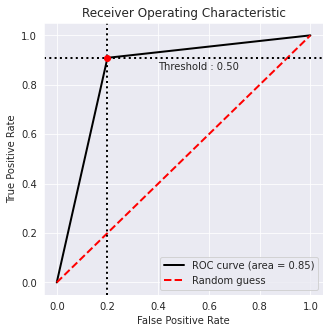

In [77]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_real, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [22]:
#loop over those files and get how many predicted a cough
x=[]
for file in wavfiles:
  pred = predict(model, file)
  append_cough_list(pred)
  print(file)



NameError: ignored

In [ ]:
x# applaus, cat , engine are true negative
# frog is false positive

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [41]:
print(pred)

[[1.90525068e-04 4.46642888e-17 3.81502554e-16 2.23005113e-13
  2.11093697e-15 8.87892526e-18 1.02538825e-10 1.47375093e-14
  1.26388684e-07 2.92526132e-15 1.15258854e-15 2.81363040e-08
  1.64261649e-12 6.58054950e-14 2.53603538e-03 3.61128547e-19
  2.30913588e-06 6.83735566e-13 6.35011475e-08 4.95218033e-10
  9.58235160e-14 5.36998268e-04 1.48825256e-15 3.09375286e-01
  4.93575699e-20 5.30155296e-15 8.37685366e-06 1.83860677e-10
  1.13976200e-12 1.85263195e-17 3.71244317e-03 7.86019600e-12
  3.41782239e-13 3.82864021e-17 7.77656002e-14 3.02953891e-15
  7.77316444e-14 2.06004842e-07 8.30693825e-05 2.34497763e-16
  1.47670387e-16 1.75107881e-01 2.38318593e-17 3.60936629e-14
  3.25092749e-15 2.30904263e-18 1.05190470e-15 2.32518905e-05
  5.08423388e-01]]


In [86]:
import numpy as np

In [38]:
sorted_pred=(-pred).argsort()[0][0:3]## get the indices of the sorted array(argsort) 
    #from highest to lowest(using the '-' turns sorting from Ascending to descending)
    

In [39]:
#sorted_pred gets the top 3 indices of values
print(sorted_pred)#https://www.geeksforgeeks.org/numpy-argsort-in-python/

[48 23 41]


In [40]:
pred[0][sorted_pred]

array([0.5084234 , 0.3093753 , 0.17510788], dtype=float32)

In [49]:
def get_if_cough_exists(get_predictions):
  sorted_pred=(-get_predictions).argsort()[0][0:3]
  count=0
  for i in sorted_pred: 
      if(i == 11) : 
          print ("Cough Exists .......") 
          
      elif i!=11:
          count+=1
  if count ==3:
    print('cough does not exist')    




In [50]:
get_if_cough_exists(pred)

cough does not exist


cough does not exist


In [ ]:
print(sorted_pred)

[11 21 19]


In [24]:
import os

In [33]:
r = os.listdir('/content/drive/My Drive/soundclasify/categories')#returns a list of directory name in a given path
r.sort()

In [34]:
print(r)

['airplane', 'breathing', 'brushing_teeth', 'can_opening', 'car_horn', 'cat', 'chainsaw', 'chirping_birds', 'church_bells', 'clapping', 'clock_alarm', 'clock_tick', 'coughing', 'cow', 'crackling_fire', 'crow', 'crying_baby', 'dog', 'door_wood_creaks', 'door_wood_knock', 'drinking_sipping', 'engine', 'fireworks', 'footsteps', 'frog', 'glass_breaking', 'hand_saw', 'helicopter', 'hen', 'insects', 'keyboard_typing', 'laughing', 'mouse_click', 'pig', 'pouring_water', 'rain', 'rooster', 'sea_waves', 'sheep', 'siren', 'sneezing', 'snoring', 'thunderstorm', 'toilet_flush', 'train', 'vacuum_cleaner', 'washing_machine', 'water_drops', 'wind']


In [ ]:
r[11 + 1]

'coughing'

In [ ]:
pred[0][21]

0.12681724

In [ ]:
print(pred)

[[1.5842386e-02 7.5005268e-08 2.3480540e-04 1.2149707e-06 1.0312051e-06
  2.6437694e-10 3.6926365e-10 2.6006849e-12 1.2874485e-04 3.0757977e-08
  3.9023846e-05 7.4365932e-01 1.9404586e-08 6.0125331e-09 3.7691652e-04
  4.8827968e-09 3.1917167e-05 2.1769323e-04 1.0673960e-03 8.7276407e-02
  2.5089417e-07 1.2681724e-01 2.7360657e-04 6.1374245e-04 2.2820144e-08
  1.6087905e-04 3.3959321e-05 1.9566217e-08 3.8299844e-10 1.3445969e-03
  2.0079777e-02 7.4073738e-05 4.0726474e-05 7.0238491e-07 1.2843825e-10
  3.0226357e-08 1.0283928e-07 1.5929015e-09 8.8185665e-12 1.2637927e-03
  5.6532622e-06 3.1178593e-04 2.1849376e-06 1.9115928e-11 7.6462076e-10
  1.8284071e-07 9.9699253e-05 2.4550265e-10 7.7094671e-11]]


In [ ]:
# Making the Confusion Matrix
y_test=[1,1,1,1,1,1,1,1,1,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

NameError: ignored